In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
palisades = gpd.read_file(os.path.join('data', 'Palisades_Perimeter_20250121', 'Palisades_Perimeter_20250121.shp'))
eaton = gpd.read_file(os.path.join('data', 'Eaton_Perimeter_20250121', 'Eaton_Perimeter_20250121.shp'))

In [3]:
aoi = xr.open_dataset(os.path.join('data','landsat8-2025-02-23-palisades-eaton.nc'))
aoi

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

/Users/galaz-garcia/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


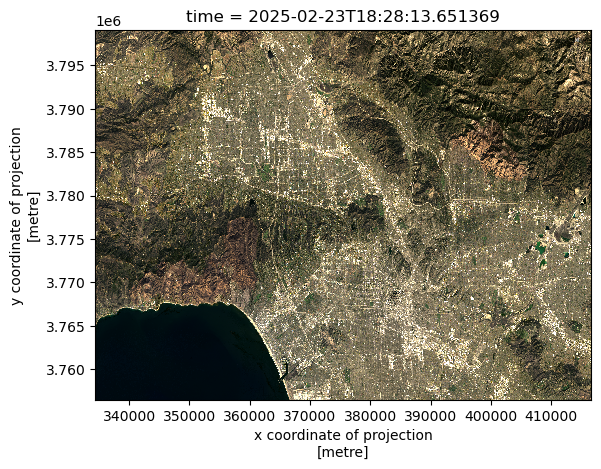

In [4]:
aoi[['red','green','blue']].to_array().plot.imshow(robust=True)

In [5]:
print(aoi.rio.crs)

None


In [6]:
aoi = aoi.rio.write_crs(aoi.spatial_ref.crs_wkt)

In [7]:
aoi

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB 1.024e+04 9.886e+03 ... 1.019e+04 9.967e+03
    green        (y, x) float32 16MB 9.93e+03 9.687e+03 ... 9.984e+03 9.662e+03
    blue         (y, x) float32 16MB 9.29e+03 9.183e+03 ... 9.49e+03 9.187e+03
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

In [8]:
print(aoi.rio.crs)

EPSG:32611


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/galaz-garcia/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


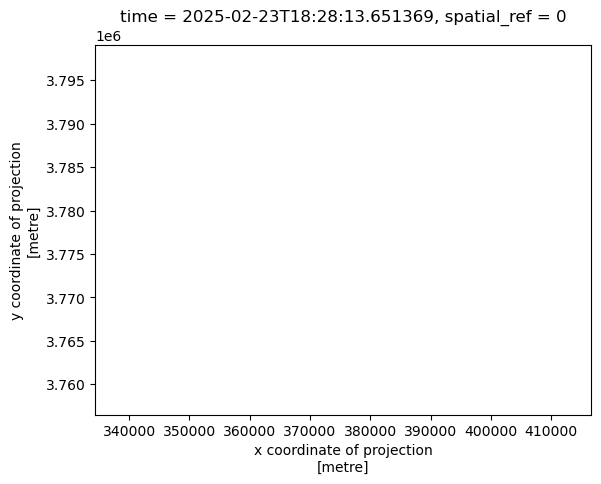

In [9]:
aoi[['red','green','blue']].to_array().plot.imshow()

/Users/galaz-garcia/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


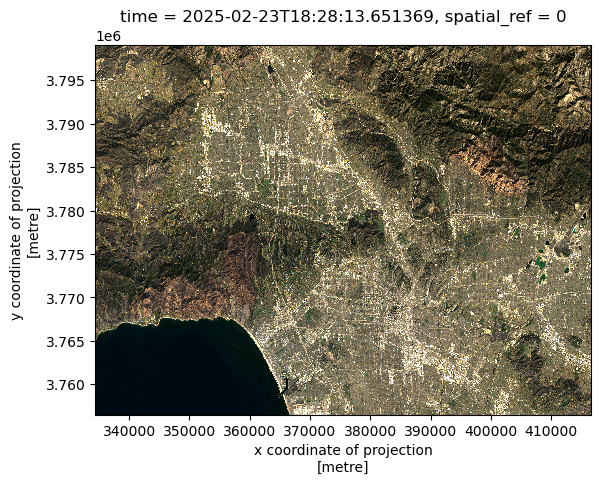

In [10]:
aoi[['red','green','blue']].to_array().plot.imshow(robust=True)

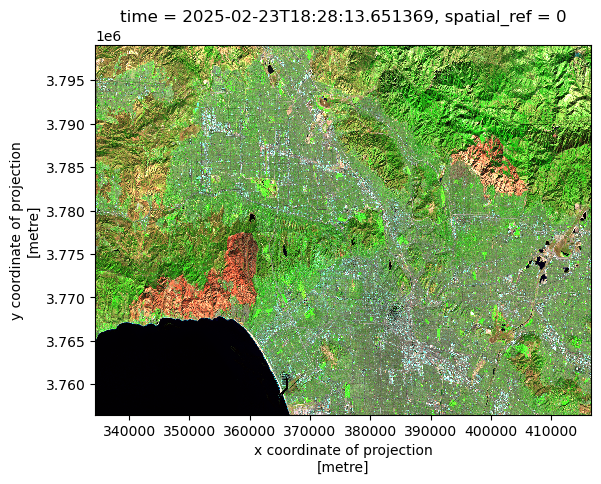

In [11]:
aoi[['swir22','nir08','red']].to_array().plot.imshow(robust=True)

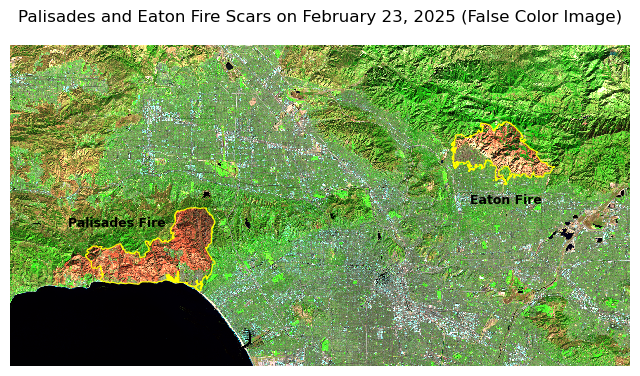

In [12]:
fig, ax = plt.subplots(figsize=(8,5))

ax.axis('off')

aoi[['swir22','nir08','red']].to_array().plot.imshow(ax=ax, robust=True)
palisades.to_crs(aoi.rio.crs).plot(ax=ax, color='none', edgecolor='yellow', linewidth = 0.8)
eaton.to_crs(aoi.rio.crs).plot(ax=ax, color='none', edgecolor='yellow', linewidth = 0.8)

ax.text(355000, 3775000, 'Palisades Fire', fontsize=9, ha='right', fontweight='bold')
ax.text(405000, 3778000, 'Eaton Fire', fontsize=9, ha='right', fontweight='bold')

plt.title("Palisades and Eaton Fire Scars on February 23, 2025 (False Color Image)") 

plt.show()

In [13]:
aoi[['red','green','blue']].to_array().values.min(), aoi[['red','green','blue']].to_array().values.max()

(nan, nan)

In [18]:
for band in ['red', 'green', 'blue']:
    print(aoi[band].min().item(), aoi[band].max().item())

819.0 65454.0
1039.0 61907.0
11.0 39119.0


In [19]:
np.isnan(aoi).sum()

<xarray.Dataset> Size: 56B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          int64 8B 0
    green        int64 8B 1
    blue         int64 8B 109
    nir08        int64 8B 0
    swir22       int64 8B 0